In [1]:
import pandas as pd
import numpy as np
from data_mani.utils import merge_market_and_gtrends
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from prediction.util import new_r2, add_shift
from prediction.util import hyper_params_search
from prediction.util import get_selected_features
from prediction.util import annualy_fit_and_predict
from prediction.models import RandomForestWrapper




from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer
from IPython.display import display, HTML
from time import time
import os
from glob import glob

## Variables

In [2]:
tickers = ['0910150D US Equity', '1288652D US Equity',
           '1831877D US Equity', 'ANDV US Equity',
           'BCR US Equity', 'GR US Equity', 'HAR US Equity',
           'HAS US Equity', 'HPC US Equity', 'MAT US Equity',
           'NBL US Equity', 'TSS US Equity', 'TWX US Equity',
           'TXU US Equity', 'WAMUQ US Equity']

ticker_name =  tickers[3]
fs_method = "fake"
market_folder = "spx"
init = time()

# Get merged dataframe 

In [3]:
ticker_path = "data/index/{}/{}.csv".format(market_folder,ticker_name)
train, test = merge_market_and_gtrends(ticker_path, test_size=0.5)
train.shape, test.shape

((1856, 183), (1856, 183))

## Add shift + Preprocessing + Selecting Features

In [4]:
words = train.drop("target_return",1).columns.to_list()

add_shift(merged_df=train, words=words, max_lag=20)

if fs_method == "all":
    select = train.drop("target_return",1).columns.to_list()
else:
    select = get_selected_features(ticker_name=ticker_name,
                                   out_folder=market_folder,
                                   fs_method=fs_method)


train = train[["target_return"] + select]
train = train.fillna(0.0)

add_shift(merged_df=test, words=words, max_lag=20)
test = test[["target_return"] + select]
test = test.fillna(0.0)

add shift: 100%|██████████| 182/182 [00:45<00:00,  4.01it/s]


In [5]:
train.shape, test.shape

((1856, 2220), (1856, 2220))

# Hyperparameter search + Prediction

In [6]:
complete = pd.concat([train, test])

pred_results = annualy_fit_and_predict(df=complete,
                                       Wrapper=RandomForestWrapper,
                                       n_iter=1,
                                       n_jobs=2,
                                       n_splits=3,
                                       target_name="target_return")

anual training and prediction:   0%|          | 0/14 [00:00<?, ?it/s]

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   19.4s finished
anual training and prediction:   7%|▋         | 1/14 [00:42<09:12, 42.48s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   29.4s finished
anual training and prediction:  14%|█▍        | 2/14 [01:35<09:06, 45.54s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


anual training and prediction:  21%|██▏       | 3/14 [01:35<05:52, 32.00s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    3.5s finished
anual training and prediction:  29%|██▊       | 4/14 [01:42<04:03, 24.39s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.5s finished
anual training and prediction:  36%|███▌      | 5/14 [01:44<02:40, 17.83s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:  2.6min finished
anual training and prediction:  43%|████▎     | 6/14 [06:40<13:29, 101.25s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    3.1s finished
anual training and prediction:  50%|█████     | 7/14 [06:46<08:27, 72.55s/it] [Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.3s finished
anual training and prediction:  57%|█████▋    | 8/14 [06:48<05:08, 51.45s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    2.0s finished
anual training and prediction:  64%|██████▍   | 9/14 [06:51<03:05, 37.05s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    4.3s finished
anual training and prediction:  71%|███████▏  | 10/14 [06:59<01:53, 28.26s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   14.7s finished
anual training and prediction:  79%|███████▊  | 11/14 [07:23<01:20, 26.98s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.1s finished
anual training and prediction:  86%|████████▌ | 12/14 [07:25<00:38, 19.42s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    8.4s finished
anual training and prediction:  93%|█████████▎| 13/14 [07:39<00:17, 17.81s/it][Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.5s finished
anual training and prediction: 100%|██████████| 14/14 [07:40<00:00, 32.88s/it]


# Saving the predictions

In [7]:
out_path = "results/forecast/{}/{}/{}.csv".format(fs_method,market_folder,ticker_name)
pred_results.to_csv(out_path, index=False)

## Analysis

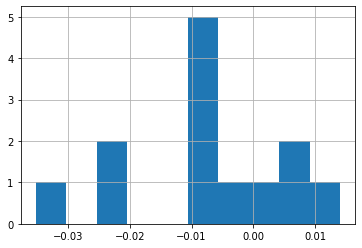

In [8]:
years = list(set(complete.index.map(lambda x: x.year)))
years.sort()
years = years[:-1]

pred_results.loc[:, "date"] = pd.to_datetime(pred_results.date)
pred_results = pred_results.set_index("date")
all_r2 = []

for year in years[1:]:
    df_ =  pred_results[str(year)]
    r2_ = new_r2(df_["return"].values, df_["prediction"].values)
    all_r2.append(r2_)
all_r2 = pd.Series(all_r2, index=years[1:])
all_r2.hist();

In [9]:
all_r2

2005   -0.006037
2006   -0.035208
2007    0.006683
2008   -0.007507
2009   -0.008890
2010    0.000535
2011   -0.007749
2012   -0.004308
2013    0.005082
2014   -0.006581
2015   -0.023399
2016   -0.025311
2017    0.014059
dtype: float64

In [10]:
tempo = (time() - init) / 60
print(np.round(tempo,2), "min")

9.29 min
